In [1]:
%pip install ultralytics==8.0.196 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 19.7 MB/s eta 0:00:00


In [1]:
%pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 20.5 MB/s eta 0:00:00


In [2]:
!pip install roboflow -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00


In [3]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/112.6 GB disk)


In [15]:


from roboflow import Roboflow
rf = Roboflow(api_key="vJ1cNa0xOQcjv4Wii35I")
project = rf.workspace("ykkk-woofa").project("sc_280_v2-kytoo")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to sc_280_v2-1 in yolov8:: 100%|██████████| 450/450 [00:00<00:00, 8917.52it/s]


In [ ]:
versions = project.versions()
for version in versions:
    print(f"Version ID: {version.id}, Version Name: {version.name}")


Version ID: ykkk-woofa/sc_280_v8/1, Version Name: sc_280_v8


In [8]:
import yaml
from IPython.display import display
data = {
    'train': '/content/sc_280_v2-1/train/images',
    'val': '/content/sc_280_v2-1/valid/images',
    'test': '/content/sc_280_v2-1/test/images',
    'names': ['Bdot','curve','dot','straight'],
    'nc': 4
}


with open('/content/sc_280_v2-1/data.yaml','w') as f:
    yaml.dump(data,f)


with open('/content/sc_280_v2-1/data.yaml','r') as f:
    data_yaml = yaml.safe_load(f)
    display(data_yaml)



{'names': ['Bdot', 'curve', 'dot', 'straight'],
 'nc': 4,
 'test': '/content/sc_280_v2-1/test/images',
 'train': '/content/sc_280_v2-1/train/images',
 'val': '/content/sc_280_v2-1/valid/images'}

In [9]:
!cat /content/sc_280_v2-1/data.yaml

names:
- Bdot
- curve
- dot
- straight
nc: 4
test: /content/sc_280_v2-1/test/images
train: /content/sc_280_v2-1/train/images
val: /content/sc_280_v2-1/valid/images


In [11]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [4]:
from pathlib import Path

train_images = list(Path('/content/sc_280_v2-1/train/images').glob('*.jpg'))  # 또는 png
train_labels = list(Path('/content/sc_280_v2-1/train/labels').glob('*.txt'))

print(f"Train images: {len(train_images)}, Train labels: {len(train_labels)}")


Train images: 151, Train labels: 151


In [32]:
!head /content/sc_280_v2-1/train/labels/*.txt


==> /content/sc_280_v2-1/train/labels/pattern_1-1-1-01-D_jpg.rf.3b4e2e11a925be789f2a65ee2ccbbb67.txt <==
2 0.28515625 0.359375 0.00390625 0.00390625
==> /content/sc_280_v2-1/train/labels/pattern_1-1-1-03-D_jpg.rf.a0f078907c6c75ea1462ba87f7b9cc4e.txt <==
2 0.021875 0.4109375 0.00390625 0.00390625
==> /content/sc_280_v2-1/train/labels/pattern_1-1-1-07-D_jpg.rf.7ca3e11a2fd92d2b96aafdfbedc03dbd.txt <==
2 0.80078125 0.734375 0.00390625 0.00390625
==> /content/sc_280_v2-1/train/labels/pattern_1-1-1-12-D_jpg.rf.8d9f79cbba3b1f09d7db4f6e19e671d2.txt <==
2 0.12578125 0.88984375 0.01875 0.01875
2 0.703125 0.25859375 0.0046875 0.0046875
2 0.05234375 0.0609375 0.0046875 0.0046875
==> /content/sc_280_v2-1/train/labels/pattern_1-1-1-14-D_jpg.rf.f9363dc11db1d413f87c8c1a1dc9d9dc.txt <==
2 0.20625 0.784375 0.00390625 0.00390625
==> /content/sc_280_v2-1/train/labels/pattern_1-1-1-16-D_jpg.rf.895ce390adc69c5b7d64647af2aeb4c6.txt <==
2 0.57421875 0.8796875 0.00390625 0.00390625
2 0.87890625 0.19765625 0.00

In [12]:
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

In [34]:
!pip install --upgrade albumentations


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.16
    Uninstalling albucore-0.0.16:
      Successfully uninstalled albucore-0.0.16
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15


In [13]:
model.train(data='/content/sc_280_v2-1/data.yaml', epochs=50, patience=10, batch=32, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/sc_280_v2-1/data.yaml, epochs=50, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e0f919f9360>
fitness: 0.21758538001823252
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.53408,    0.040077,    0.020593,     0.19825])
names: {0: 'Bdot', 1: 'curve', 2: 'dot', 3: 'straight'}
plot: True
results_dict: {'metrics/precision(B)': 0.006877883885421719, 'metrics/recall(B)': 0.5696364567332309, 'metrics/mAP50(B)': 0.3915917774722821, 'metrics/mAP50-95(B)': 0.19825133585667146, 'fitness': 0.21758538001823252}
save_dir: PosixPath('runs/detect/train5')
speed: {'preprocess': 0.20076433817545575, 'inference': 2.1154138776991105, 'loss': 0.0004450480143229167, 'postprocess': 1.3767825232611761}

In [14]:
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 4
{0: 'Bdot', 1: 'curve', 2: 'dot', 3: 'straight'}


In [16]:
results = model.predict(source='/content/sc_280_v2-1/valid/images', save=True)


image 1/45 /content/sc_280_v2-1/valid/images/pattern_1-1-1-19-D_jpg.rf.a80ee75ee19c3487e4ccbe0e0555a2e0.jpg: 640x640 (no detections), 9.8ms
image 2/45 /content/sc_280_v2-1/valid/images/pattern_1-1-1-27-D_jpg.rf.cec634e50c95d9d01306b1c36fa726c8.jpg: 640x640 (no detections), 8.5ms
image 3/45 /content/sc_280_v2-1/valid/images/pattern_1-1-1-33-D_jpg.rf.04ca7017793d29ac88ec096f7cee39e0.jpg: 640x640 (no detections), 15.6ms
image 4/45 /content/sc_280_v2-1/valid/images/pattern_1-1-1-38-D_jpg.rf.d1016b767dda5f4c3fd2b7341004f279.jpg: 640x640 (no detections), 8.4ms
image 5/45 /content/sc_280_v2-1/valid/images/pattern_1-1-2-07-D_jpg.rf.62ab67863fea09e3ade538dd2d52dbfa.jpg: 640x640 (no detections), 7.5ms
image 6/45 /content/sc_280_v2-1/valid/images/pattern_1-1-2-09-D_jpg.rf.e24cbe3c686b072594329da1409a8a2e.jpg: 640x640 (no detections), 7.5ms
image 7/45 /content/sc_280_v2-1/valid/images/pattern_1-1-3-01-D_jpg.rf.520d234bcd9749da6f0d28dbbc6ba3b2.jpg: 640x640 (no detections), 7.4ms
image 8/45 /conten

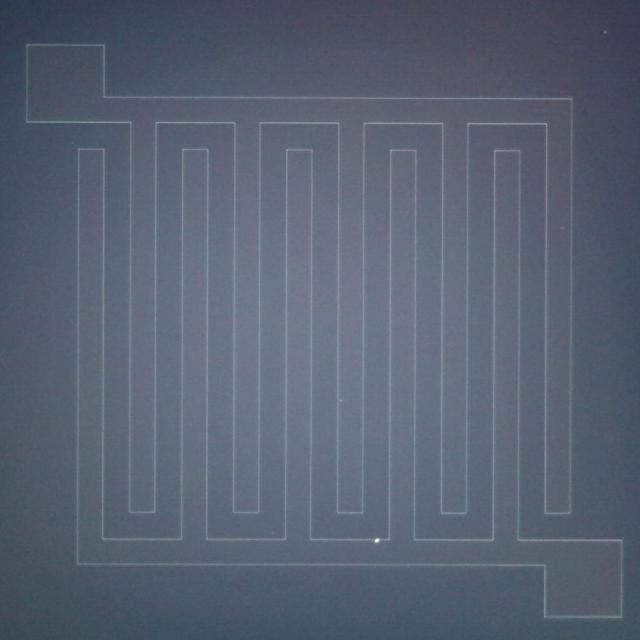

In [19]:
import glob
import random
from IPython.display import Image,display

Image_name = random.choice(glob.glob('/content/runs/detect/predict/*.jpg'))
display(Image(filename=Image_name, width=600, height=600))

In [4]:


from roboflow import Roboflow
rf = Roboflow(api_key="vJ1cNa0xOQcjv4Wii35I")
project = rf.workspace("ykkk-woofa").project("sc_280_v2-kytoo")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.9, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to sc_280_v2-2 in yolov8:: 100%|██████████| 1356/1356 [00:00<00:00, 8239.22it/s]


In [5]:
import yaml
from IPython.display import display

data = {
    'train': '/content/sc_280_v2-2/train/images',
    'val': '/content/sc_280_v2-2/valid/images',
    'test': '/content/sc_280_v2-2/test/images',
    'names': ['Bdot','circle','curve','curve.circuit','dot','edge-circult','straight'],
    'nc': 7
}


with open('/content/sc_280_v2-2/data.yaml','w') as f:
    yaml.dump(data,f)


with open('/content/sc_280_v2-2/data.yaml','r') as f:
    data_yaml = yaml.safe_load(f)
    display(data_yaml)

{'names': ['Bdot',
  'circle',
  'curve',
  'curve.circuit',
  'dot',
  'edge-circult',
  'straight'],
 'nc': 7,
 'test': '/content/sc_280_v2-2/test/images',
 'train': '/content/sc_280_v2-2/train/images',
 'val': '/content/sc_280_v2-2/valid/images'}

In [6]:
!cat /content/sc_280_v2-2/data.yaml

names:
- Bdot
- circle
- curve
- curve.circuit
- dot
- edge-circult
- straight
nc: 7
test: /content/sc_280_v2-2/test/images
train: /content/sc_280_v2-2/train/images
val: /content/sc_280_v2-2/valid/images


In [7]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 91.0MB/s]


In [8]:
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

In [9]:
model.train(data='/content/sc_280_v2-2/data.yaml', epochs=50, patience=10, batch=32, imgsz=640)

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/sc_280_v2-2/data.yaml, epochs=50, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

100%|██████████| 755k/755k [00:00<00:00, 22.0MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.1MB/s]


AMP: checks passed ✅


train: Scanning /content/sc_280_v2-2/train/labels... 588 images, 6 backgrounds, 0 corrupt: 100%|██████████| 588/588 [00:00<00:00, 1851.44it/s]

train: New cache created: /content/sc_280_v2-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/sc_280_v2-2/valid/labels... 56 images, 0 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<00:00, 1274.41it/s]

val: New cache created: /content/sc_280_v2-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.13G      3.569      8.307      2.039         26        640: 100%|██████████| 19/19 [00:11<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]

                   all         56        269          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       4.3G      2.957      6.844      1.548         54        640: 100%|██████████| 19/19 [00:10<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         56        269    3.7e-05     0.0333    0.00082    8.2e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.43G      2.731       5.62       1.39         74        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         56        269   0.000102     0.0667    0.00151   0.000151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.59G      2.686      5.582      1.391         80        640: 100%|██████████| 19/19 [00:08<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         56        269   0.000331      0.133   0.000473   6.49e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.33G      2.553      4.924      1.299         72        640: 100%|██████████| 19/19 [00:10<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         56        269    0.00139      0.275     0.0503     0.0206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.67G       2.53      4.906      1.286         21        640: 100%|██████████| 19/19 [00:10<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all         56        269     0.0577      0.544      0.104     0.0327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.51G       2.49      4.241      1.277         51        640: 100%|██████████| 19/19 [00:07<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         56        269      0.179     0.0336     0.0693      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.63G       2.57      3.864      1.284         50        640: 100%|██████████| 19/19 [00:10<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         56        269      0.413      0.282      0.232      0.079



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.46G      2.439      3.931      1.264         26        640: 100%|██████████| 19/19 [00:10<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all         56        269      0.494      0.213      0.314     0.0913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.28G      2.415      3.469      1.277         52        640: 100%|██████████| 19/19 [00:09<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         56        269      0.188      0.299       0.17     0.0602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.75G      2.343      3.373      1.222         58        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         56        269      0.442      0.281       0.22     0.0967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.59G      2.318      3.382      1.225         37        640: 100%|██████████| 19/19 [00:08<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         56        269      0.262      0.299      0.292      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.48G      2.243      3.071      1.197         59        640: 100%|██████████| 19/19 [00:09<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         56        269      0.308      0.425      0.248      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.48G      2.294      2.953      1.219         54        640: 100%|██████████| 19/19 [00:10<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         56        269      0.448       0.31      0.343      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.42G      2.257      2.955      1.214         51        640: 100%|██████████| 19/19 [00:07<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         56        269      0.465      0.222      0.301      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.64G      2.224       2.88      1.158         49        640: 100%|██████████| 19/19 [00:10<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         56        269      0.504      0.215      0.312      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.33G      2.136      2.778      1.151         51        640: 100%|██████████| 19/19 [00:10<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all         56        269       0.33      0.293       0.29      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.23G      2.167      2.659      1.155         79        640: 100%|██████████| 19/19 [00:08<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         56        269      0.327       0.53      0.386      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.54G      2.153      2.646      1.132         42        640: 100%|██████████| 19/19 [00:11<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         56        269      0.515      0.291      0.279      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.45G      2.145      2.585      1.153         99        640: 100%|██████████| 19/19 [00:09<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         56        269      0.327      0.464      0.383      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.41G      2.077      2.481       1.16         33        640: 100%|██████████| 19/19 [00:07<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         56        269      0.321      0.412      0.372      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.53G      2.128      2.424      1.161         50        640: 100%|██████████| 19/19 [00:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         56        269      0.461      0.381      0.425      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.45G      2.102      2.332      1.148        102        640: 100%|██████████| 19/19 [00:08<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         56        269      0.353      0.524      0.392       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.49G       2.13      2.366      1.159         55        640: 100%|██████████| 19/19 [00:08<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         56        269      0.344      0.421      0.344      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       4.6G      2.047       2.37      1.111         36        640: 100%|██████████| 19/19 [00:11<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         56        269      0.351       0.38      0.317       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.65G      2.049      2.254      1.093         64        640: 100%|██████████| 19/19 [00:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

                   all         56        269      0.412      0.367      0.345      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.58G      2.041       2.31      1.113         40        640: 100%|██████████| 19/19 [00:10<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         56        269      0.389      0.376      0.312      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.58G      2.048      2.196      1.119         51        640: 100%|██████████| 19/19 [00:10<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         56        269      0.261      0.521      0.391      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.49G      1.971      2.141      1.089         48        640: 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         56        269      0.518      0.411      0.459      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.59G      1.961      2.093      1.099         38        640: 100%|██████████| 19/19 [00:11<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         56        269      0.336      0.493      0.386       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.49G      2.035      2.056       1.13         43        640: 100%|██████████| 19/19 [00:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         56        269      0.355      0.471      0.317      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.59G      1.916      1.967      1.094         37        640: 100%|██████████| 19/19 [00:10<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         56        269      0.366      0.551      0.399      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.23G      1.885      1.943      1.087         51        640: 100%|██████████| 19/19 [00:10<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         56        269      0.444      0.424      0.404      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.49G      1.908      1.989      1.088         38        640: 100%|██████████| 19/19 [00:07<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         56        269      0.375      0.409      0.384      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.65G      1.884      1.997      1.068         73        640: 100%|██████████| 19/19 [00:11<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         56        269      0.226      0.367      0.328      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.46G      1.887      2.004      1.078         51        640: 100%|██████████| 19/19 [00:09<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all         56        269      0.466      0.435      0.379      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       4.7G      1.847      1.905      1.063         41        640: 100%|██████████| 19/19 [00:08<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         56        269      0.246      0.518      0.352      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.65G      1.844      1.864      1.052         39        640: 100%|██████████| 19/19 [00:10<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         56        269      0.313       0.56      0.335      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.52G      1.819      1.893      1.046         55        640: 100%|██████████| 19/19 [00:08<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         56        269      0.227      0.456      0.267      0.121
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 29, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



39 epochs completed in 0.134 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


                   all         56        269      0.616      0.467      0.475      0.183
                  Bdot         11         13      0.352      0.385      0.337      0.216
                circle          1          3          1      0.616      0.727      0.203
                 curve          5         42       0.31      0.405      0.296      0.124
         curve.circuit          2          6      0.654      0.833      0.871      0.325
                   dot         53        205      0.766     0.0956      0.144     0.0484
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f7d96542320>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [10]:
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 7
{0: 'Bdot', 1: 'circle', 2: 'curve', 3: 'curve.circuit', 4: 'dot', 5: 'edge-circult', 6: 'straight'}


In [11]:
results = model.predict(source='/content/sc_280_v2-2/valid/images', save=True)


image 1/56 /content/sc_280_v2-2/valid/images/pattern_1-1-1-19-D_jpg.rf.a80ee75ee19c3487e4ccbe0e0555a2e0.jpg: 640x640 (no detections), 8.1ms
image 2/56 /content/sc_280_v2-2/valid/images/pattern_1-1-1-20-D_jpg.rf.f36bfe621308ba8cb54e154b297c1083.jpg: 640x640 (no detections), 7.1ms
image 3/56 /content/sc_280_v2-2/valid/images/pattern_1-1-1-27-D_jpg.rf.cec634e50c95d9d01306b1c36fa726c8.jpg: 640x640 1 Bdot, 1 dot, 7.7ms
image 4/56 /content/sc_280_v2-2/valid/images/pattern_1-1-1-33-D_jpg.rf.04ca7017793d29ac88ec096f7cee39e0.jpg: 640x640 1 dot, 9.5ms
image 5/56 /content/sc_280_v2-2/valid/images/pattern_1-1-1-37-D_jpg.rf.60646cf4b1a22a29991035b17f63da0d.jpg: 640x640 (no detections), 7.1ms
image 6/56 /content/sc_280_v2-2/valid/images/pattern_1-1-1-38-D_jpg.rf.d1016b767dda5f4c3fd2b7341004f279.jpg: 640x640 1 dot, 7.1ms
image 7/56 /content/sc_280_v2-2/valid/images/pattern_1-1-2-07-D_jpg.rf.62ab67863fea09e3ade538dd2d52dbfa.jpg: 640x640 (no detections), 7.1ms
image 8/56 /content/sc_280_v2-2/valid/ima

In [12]:
print(type(results), len(results))

<class 'list'> 56


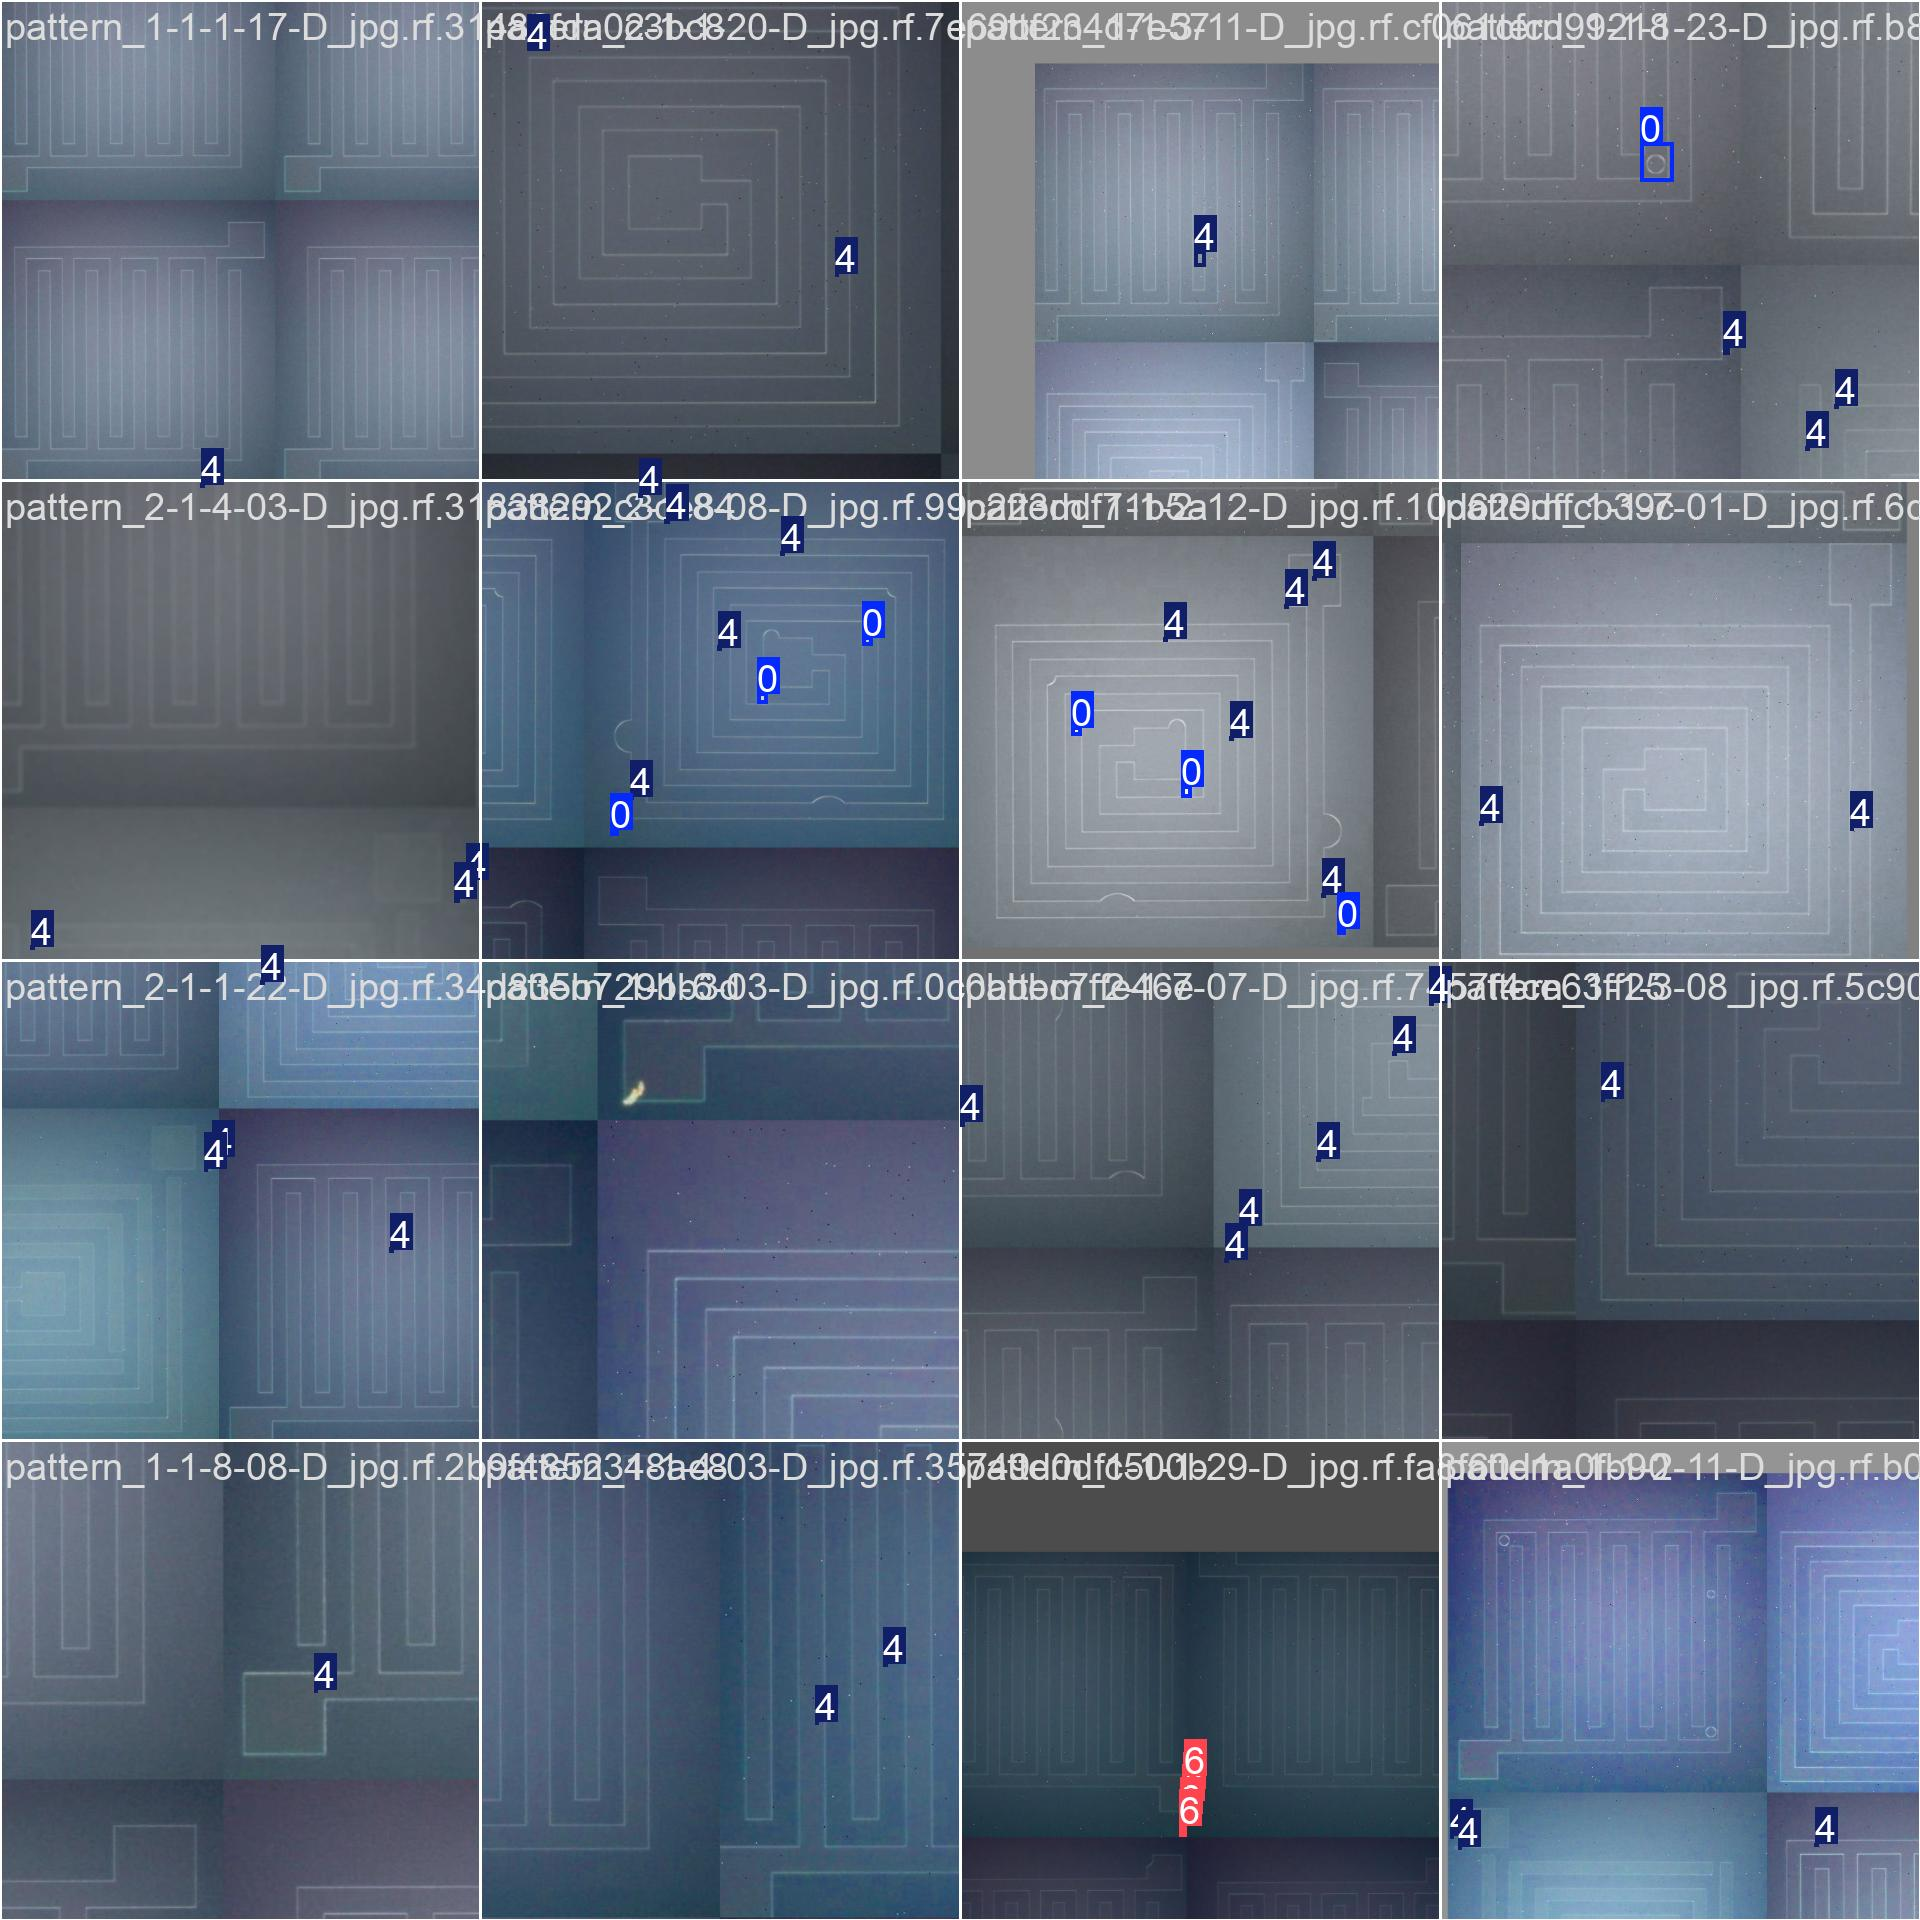

In [25]:
import glob
import random
from IPython.display import Image,display

Image_name = random.choice(glob.glob('/content/runs/detect/train/*.jpg'))
display(Image(filename=Image_name, width=600, height=600))

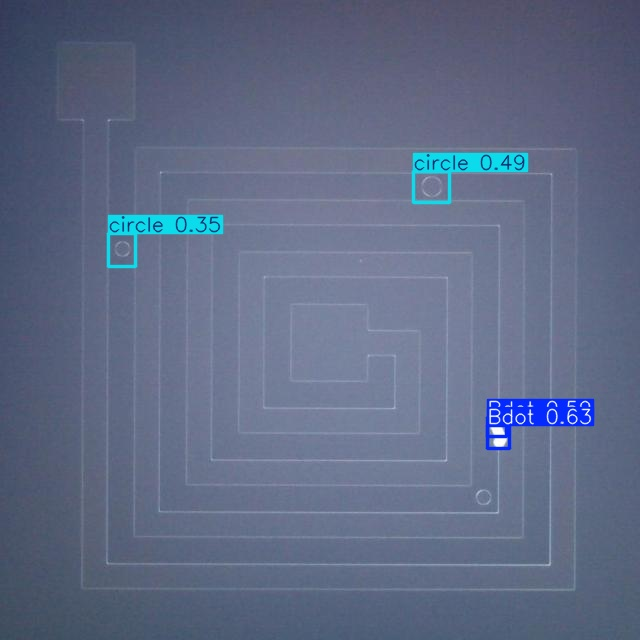

In [23]:
import glob
import random
from IPython.display import Image,display

Image_name = random.choice(glob.glob('/content/runs/detect/train2/*.jpg'))
display(Image(filename=Image_name, width=600, height=600))